In [43]:
# -----------------------------------------------------------------
# Logistric Regression
# Predict the income of an adult based on the census data
# -----------------------------------------------------------------

In [44]:
# Import libraries
import pandas as pd
import seaborn as sns

In [45]:
# Read dataset
data = pd.read_csv('04 - decisiontreeAdultIncome.csv')
data.head()

,age,wc,education,marital status,race,gender,hours per week,IncomeClass
0,38,Private,HS-grad,Divorced,White,Male,40,<=50K
1,28,Private,Bachelors,Married,Black,Female,40,<=50K
2,37,Private,Masters,Married,White,Female,40,<=50K
3,31,Private,Masters,Never-married,White,Female,50,>50K
4,42,Private,Bachelors,Married,White,Male,40,>50K


In [46]:
# Check for Null values
data.isnull().sum(axis=0)

age               0
wc                0
education         0
marital status    0
race              0
gender            0
hours per week    0
IncomeClass       0
dtype: int64

In [47]:
data['education'].value_counts()

 HS-grad         8207
 Some-college    5559
 Bachelors       4162
 Masters         1285
 Prof-school      309
 Doctorate        221
 Preschool         44
Name: education, dtype: int64

In [48]:
data['education']

0              HS-grad
1            Bachelors
2              Masters
3              Masters
4            Bachelors
             ...      
19782          Masters
19783     Some-college
19784          HS-grad
19785          HS-grad
19786          HS-grad
Name: education, Length: 19787, dtype: object

In [49]:
from sklearn import preprocessing
le_education = preprocessing.LabelEncoder()
le_education.fit(data['education'])
le_education.transform(data['education'])

array([2, 0, 3, ..., 2, 2, 2])

In [50]:
# Create Label Encoder
from sklearn import preprocessing
le_education = preprocessing.LabelEncoder()
le_education.fit(data['education'])
data['le_education']=le_education.transform(data['education'])
data = data.drop(['education'], axis=1)

In [51]:
data.head()

,age,wc,marital status,race,gender,hours per week,IncomeClass,le_education
0,38,Private,Divorced,White,Male,40,<=50K,2
1,28,Private,Married,Black,Female,40,<=50K,0
2,37,Private,Married,White,Female,40,<=50K,3
3,31,Private,Never-married,White,Female,50,>50K,3
4,42,Private,Married,White,Male,40,>50K,0


In [52]:
data['wc'].value_counts()

 Private         17248
 Local-gov        1717
 Federal-gov       819
 Never-worked        3
Name: wc, dtype: int64

In [53]:
lb_wc.classes_

array([' Federal-gov', ' Local-gov', ' Never-worked', ' Private'],
      dtype='<U13')

In [54]:
from sklearn import preprocessing
lb_wc = preprocessing.LabelBinarizer()
lb_wc.fit(data['wc'])
lb_wc_df=pd.DataFrame(lb_wc.transform(data['wc']),columns=lb_wc.classes_)
lb_wc_df.head()

,Federal-gov,Local-gov,Never-worked,Private
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [55]:
data=pd.concat([data,lb_wc_df],axis=1)
data = data.drop(['wc'], axis=1)
data.head()

,age,marital status,race,gender,hours per week,IncomeClass,le_education,Federal-gov,Local-gov,Never-worked,Private
0,38,Divorced,White,Male,40,<=50K,2,0,0,0,1
1,28,Married,Black,Female,40,<=50K,0,0,0,0,1
2,37,Married,White,Female,40,<=50K,3,0,0,0,1
3,31,Never-married,White,Female,50,>50K,3,0,0,0,1
4,42,Married,White,Male,40,>50K,0,0,0,0,1


In [56]:
from sklearn import preprocessing
lb_martial_status = preprocessing.LabelBinarizer()
lb_martial_status.fit(data['marital status'])
lb_martial_status_df=pd.DataFrame(lb_martial_status.transform(data['marital status']),columns=lb_martial_status.classes_)
data=pd.concat([data,lb_martial_status_df],axis=1)
data = data.drop(['marital status'], axis=1)
data.head()

,age,race,gender,hours per week,IncomeClass,le_education,Federal-gov,Local-gov,Never-worked,Private,Divorced,Never-married,Widowed,Married
0,38,White,Male,40,<=50K,2,0,0,0,1,1,0,0,0
1,28,Black,Female,40,<=50K,0,0,0,0,1,0,0,0,1
2,37,White,Female,40,<=50K,3,0,0,0,1,0,0,0,1
3,31,White,Female,50,>50K,3,0,0,0,1,0,1,0,0
4,42,White,Male,40,>50K,0,0,0,0,1,0,0,0,1


C:\Users\prudi\anaconda3\envs\june31_test\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

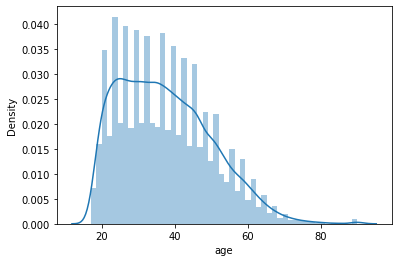

In [57]:
sns.distplot(data['age'])

C:\Users\prudi\anaconda3\envs\june31_test\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='StandardScaler_age', ylabel='Density'>

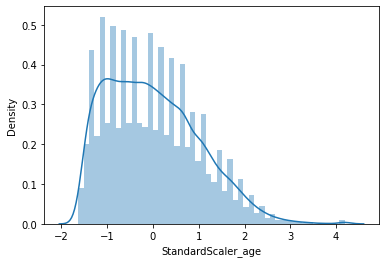

In [58]:
from sklearn.preprocessing import StandardScaler
scalar_ = StandardScaler()
data['StandardScaler_age'] = scalar_.fit_transform(data[['age']])
sns.distplot(data['StandardScaler_age'])

C:\Users\prudi\anaconda3\envs\june31_test\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='minmax_age', ylabel='Density'>

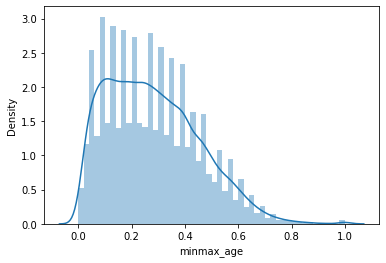

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['minmax_age'] = scaler.fit_transform(data[['age']])
sns.distplot(data['minmax_age'])

In [60]:
data.head()

,age,race,gender,hours per week,IncomeClass,le_education,Federal-gov,Local-gov,Never-worked,Private,Divorced,Never-married,Widowed,Married,StandardScaler_age,minmax_age
0,38,White,Male,40,<=50K,2,0,0,0,1,1,0,0,0,0.042464,0.287671
1,28,Black,Female,40,<=50K,0,0,0,0,1,0,0,0,1,-0.754790,0.150685
2,37,White,Female,40,<=50K,3,0,0,0,1,0,0,0,1,-0.037262,0.273973
3,31,White,Female,50,>50K,3,0,0,0,1,0,1,0,0,-0.515614,0.191781
4,42,White,Male,40,>50K,0,0,0,0,1,0,0,0,1,0.361365,0.342466


In [61]:
# Create Dummy variables
data.dtypes
data_prep = pd.get_dummies(data, drop_first=True)
data_prep.head()

,age,hours per week,le_education,Federal-gov,Local-gov,Never-worked,Private,Divorced,Never-married,Widowed,Married,StandardScaler_age,minmax_age,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,gender_ Male,IncomeClass_ >50K
0,38,40,2,0,0,0,1,1,0,0,0,0.042464,0.287671,0,0,0,1,1,0
1,28,40,0,0,0,0,1,0,0,0,1,-0.754790,0.150685,0,1,0,0,0,0
2,37,40,3,0,0,0,1,0,0,0,1,-0.037262,0.273973,0,0,0,1,0,0
3,31,50,3,0,0,0,1,0,1,0,0,-0.515614,0.191781,0,0,0,1,0,1
4,42,40,0,0,0,0,1,0,0,0,1,0.361365,0.342466,0,0,0,1,1,1


In [62]:
# Create X and Y Variables
X = data_prep.iloc[:, :-1]
Y = data_prep.iloc[:, -1]


In [63]:
# Split the X and Y dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1234, stratify=Y)

In [64]:
# Build the Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [65]:
lr.fit(X_train, Y_train)

C:\Users\prudi\anaconda3\envs\june31_test\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [66]:
lr

LogisticRegression()

In [67]:
X_test.head(1)

,age,hours per week,le_education,Federal-gov,Local-gov,Never-worked,Private,Divorced,Never-married,Widowed,Married,StandardScaler_age,minmax_age,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,gender_ Male
13297,43,40,6,0,0,0,1,0,0,0,1,0.44109,0.356164,0,0,0,1,1


In [68]:
pd.DataFrame(X_test.loc[13297:9366,:])

,age,hours per week,le_education,Federal-gov,Local-gov,Never-worked,Private,Divorced,Never-married,Widowed,Married,StandardScaler_age,minmax_age,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,gender_ Male
13297,43,40,6,0,0,0,1,0,0,0,1,0.441090,0.356164,0,0,0,1,1
9366,42,40,6,0,0,0,1,0,0,1,0,0.361365,0.342466,0,1,0,0,0


In [69]:
# Predict the outcome using Test data
Y_predict = lr.predict(pd.DataFrame(X_test.loc[13297:9366,:]))
Y_predict

array([0, 0], dtype=uint8)

In [71]:
lr.predict_proba(pd.DataFrame(X_test.loc[13297:9366,:]))

array([[0.64068938, 0.35931062],
       [0.96272852, 0.03727148]])

In [12]:
# Build the conufsion matrix and get the accuracy/score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_predict)

score = lr.score(X_test, Y_test)

In [13]:
score

0.8115209701869631

In [27]:
lr.predict_proba[pd.DataFrame(X_test.loc[13297:9366,:])]

TypeError: 'method' object is not subscriptable